In [ ]:
import os
directory = "C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL_Project"
os.chdir(directory)
from Scripts import Utilities as ut
from Scripts import Feature_Extraction as fe
from Scripts import data_loading as dl
from Scripts import Model_Training as mt
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
dataset = "ESC50"

In [2]:
# Seperate the test folder for it to not be messed in th training process
ut.split_train_test(dataset, "ESC50\\ESC-50-master\\meta\\esc50.csv", "ESC50\\CSVs\\Train_csv", "ESC50\\CSVs\\Test_csv")

In [ ]:
ut.move_train_test_folder(dataset,"ESC50\\CSVs\\Train_csv","ESC50\\Train","ESC50\\ESC-50-master\\audio")

ut.move_train_test_folder(dataset, "ESC50\\CSVs\\Test_csv","ESC50\\Test","ESC50\\ESC-50-master\\audio")

In [ ]:
# In train folder put evry file in the corespondiong category
ut.move_to_class_folder("ESC50\\CSVs\\Train_csv","ESC50\\Train",dataset)

In [3]:
fe.CNN_Features_mel("ESC50\\Train", "ESC50\Features\CNN_Features")


No files failed.


In [2]:
x_train, x_val, y_train, y_val ,encode =  dl.load_data("ESC50\Features\CNN_Features", dataset)

In [16]:

model = mt.create_model_CNN_AS(num_classes=50)
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate = learning_rate ), loss='categorical_crossentropy', metrics=[mt.f1_score, 'accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, verbose=1)
checkpoint = ModelCheckpoint( 'Models\\temp.h5',monitor='val_accuracy', verbose=1,   save_best_only=True, mode='max')

In [ ]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100, callbacks = [early_stopping,checkpoint],
    batch_size=16
    )

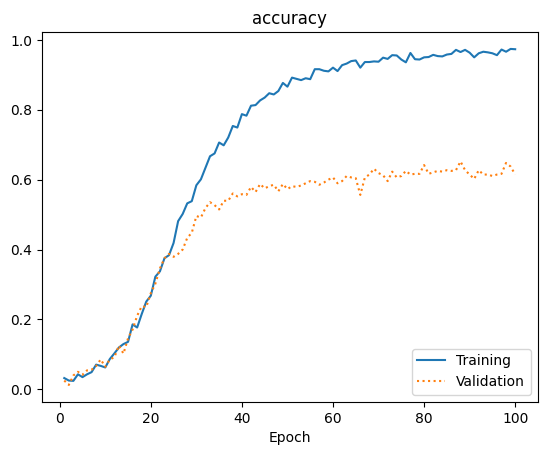

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
mt.plot_training_history(acc,val_acc,"accuracy")

15/15 [==============================] - 0s 10ms/step
Accuracy: 0.6145833333333334
F1 Score: 0.6001135410545492


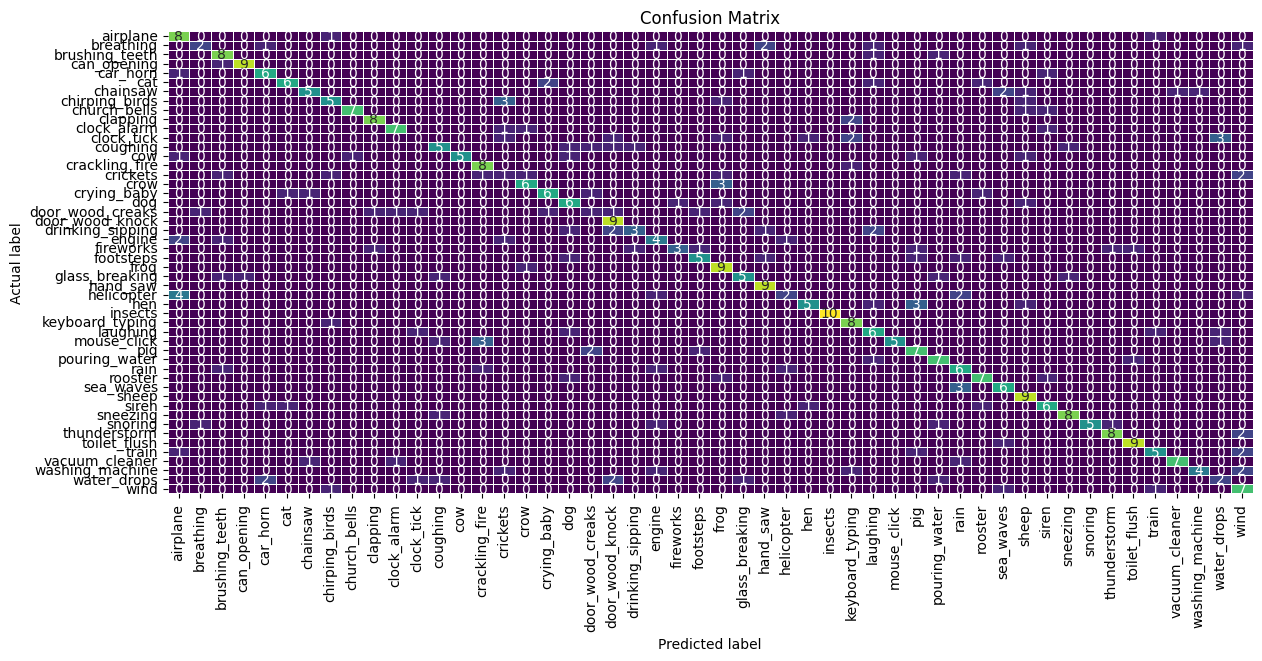

In [19]:
mt.plot_confusion_matrix(model,x_val,y_val,encode)

In [4]:
# model  = mt.model_load("Models\\temp.h5")
# clear_output()
print(mt.classification_report(model,x_val,y_val,encode))

15/15 [==============================] - 0s 10ms/step
                  precision    recall  f1-score   support

        airplane       0.53      0.80      0.64        10
       breathing       0.67      0.44      0.53         9
  brushing_teeth       0.50      0.80      0.62        10
     can_opening       0.89      0.80      0.84        10
        car_horn       0.60      0.67      0.63         9
             cat       0.67      0.60      0.63        10
        chainsaw       0.70      0.70      0.70        10
  chirping_birds       0.64      0.70      0.67        10
    church_bells       0.86      0.67      0.75         9
        clapping       0.78      0.70      0.74        10
     clock_alarm       0.73      0.80      0.76        10
      clock_tick       0.43      0.33      0.38         9
        coughing       0.62      0.50      0.56        10
             cow       1.00      0.60      0.75        10
  crackling_fire       0.70      0.78      0.74         9
        crickets 